#**Ejercicio 1**

La sucesión de Fibonacci está dada por la siguiente expresión

$$F_n = F_{n-1}+F_{n-2}$$

Donde $F_{n-1}$ y $F_{n-2}$ son los terminos anteriores a $F_n$

La sucesión inicia con $F_0=0$ y $F_1 = 1$, siendo así una sucesión infinita e iterativa.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def fibonacci(n):
  fn_2 = 0
  fn_1 = 1
  lista_fn = np.array([fn_2, fn_1])
  for i in range(n):
    fn = fn_1 + fn_2
    fn_2, fn_1 = fn_1, fn    
    lista_fn = np.append(lista_fn, fn)
  return lista_fn

#**Ejercicio 2**

La espiral de Fibonacci puede interpretarse como la sucesión de longitudes de $\frac{{1}}{4}$ de arco de radio $R_n=F_{n+2}$. 

Analizando la espiral, puede notarse que cada segmento de la longitud de arco, en coordenadas cartesianas puede expresarse como 

$$x=Rcos(\theta)+x_0$$
$$y=Rsin(\theta)+y_0$$

De modo que en la n-ésima iteración de la sucesión, el Radio varía en función del n-ésimo termino de la sucesión y los centros de dicha longitud de arco $(x_0,y_0)$ se van modificando.

Se observa que $x_0$ varía en las $n$ iteraciones impares de la sucesión y $y_0$ lo hace en las $n$ iteraciones pares de la sucesión. Adicional a ello, se observa que los valores que $x_0$ y $y_0$ adquieren en sus $n$ iteraciones respectivas, son alternantes en la adición o sustracción del n-ésimo termino de la sucesión $F_n$. Esto puede apreciarse mejor bajo la siguiente tabla.

In [ ]:
n = np.arange(1,9)
radios = fibonacci(8+2)[2:]
x_0 = np.array(["F0","F0","F0-F2","F0-F2","F0-F2+F4","F0-F2+F4","F0-F2+F4-F6","F0-F2+F4-F6"])
y_0 = np.array([0,"0+F1","0+F1","0+F1-F3","0+F1-F3","0+F1-F3+F5","0+F1-F3+F5","0+F1-F3+F5-F7"])
x = np.array([0,0,-1,-1,2,2,-6,-6])
y = np.array([0,1,1,-1,-1,4,4,-9])
pd.DataFrame(list(zip(radios,x_0,y_0,x,y)), index = n, columns = ["R","X0", "Y0","Valor X0","Valor Y0"])

,R,X0,Y0,Valor X0,Valor Y0
1,1,F0,0,0,0
2,2,F0,0+F1,0,1
3,3,F0-F2,0+F1,-1,1
4,5,F0-F2,0+F1-F3,-1,-1
5,8,F0-F2+F4,0+F1-F3,2,-1
6,13,F0-F2+F4,0+F1-F3+F5,2,4
7,21,F0-F2+F4-F6,0+F1-F3+F5,-6,4
8,34,F0-F2+F4-F6,0+F1-F3+F5-F7,-6,-9


Ubicando el centro de la espiral en las coordenadas $(0,0)$ se puede definir la variación del Radio en función de la iteración así

$$R(n) = F_{n+2}$$

La variación de $x_0$ se da en las $n$ iteraciones impares. Esto puede matematizarse mediante la operación modulo.

$$x_0(1) = F_{n-1}=0$$
$$x_0(n)=x_0(n-1)+(n\%2)...$$

Esto permite que cuando $n$ es impar, el modulo $n\%2$ es $1$ y permite añadir la variación respectiva y cuando $n$ es par, el modulo es $0$ y no se añade ninguna variación al valor.

La variación que se da en los $n$ impares, consiste en la acumulación alternante de los $F_{n-1}$. Sin embargo, se requiere un metodo para que solamente se acumulen (alternando) dichos $F_{n-1}$.

Una alternancia se define como $(-1)^n$, sin embargo, en este caso nuestro exponente se define así:

Si la variación se da sobre los $n$ impares, $n + 1$ es par. Un numero par, divido entre dos $\frac{{n+1}}{2}$ alterna entre pares e impares lo cual permite que se dé una alternancia entre los $n$ impares. Por conveniencia en el orden en el que se da la alternancia para $x_0(n)$ se requiere una iniciación en positivo, lo cual se soluciona adicionando un $1$ al exponente de modo que sea $1+\frac{{n+1}}{2}$.

Dicho esto, la expresión para $x_0(n)$ corresponde a la siguiente sucesión

$$x_0(n) = x_0(n-1) + (n\%2)F_{n-1}(-1)^{1+\frac{{n+1}}{2}}$$

Se puede realizar un analisis similar para $y_0(n)$ que varía sobre los $n$ pares y llegar a la siguiente expresión.

$$y_0(1) = 0$$

$$y_0(n)=y_0(n-1) + (n+1\%2)F_{n-1}(-1)^{1+\frac{{n+1}}{2}}$$

In [ ]:
def espiral(n):
  lista_fn = fibonacci(n)
  x_0 = 0
  y_0 = 0
  lista_x0 = np.array([x_0])
  lista_y0 = np.array([y_0])

#Programación de la teoría explicada
  for i in range(1, len(lista_fn)):
    x_0 = x_0 + ((i%2)*lista_fn[i]*((-1)**(1 + ((i + 1)/2))))
    y_0 = y_0 + (((i+1)%2)*lista_fn[i]*((-1)**(1 + (i+2)/2)))
    lista_x0 = np.append(lista_x0, x_0)
    lista_y0 = np.append(lista_y0, y_0)

#Genera las listas con los valores de X y Y para su graficación 
  lista_radios = fibonacci(n + 2)[2:] #El radio empieza desde 1 hacia adelante en la sucesión
  theta_i = np.pi
  theta_f = 1.5*np.pi
  for i in range(len(lista_fn)):
    lista_theta = np.arange(theta_i, theta_f, 0.001)
    trazo_x = (lista_radios[i]*np.sin(lista_theta)) + lista_x0[i]
    trazo_y = (lista_radios[i]*np.cos(lista_theta)) + lista_y0[i]
    theta_i += 0.5*np.pi
    theta_f += 0.5*np.pi
    plt.plot(trazo_x, trazo_y) #Produce una superposición de los trazos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

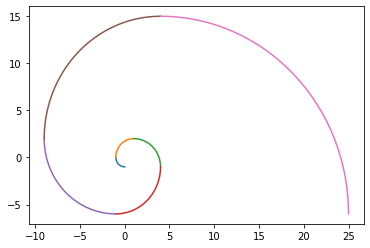

In [ ]:
espiral(5)

#**Ejercicio 3**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

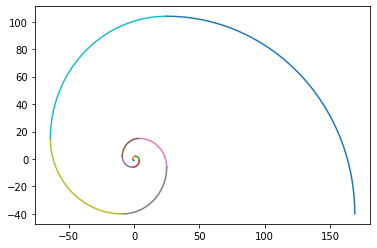

In [ ]:
espiral(5+4)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

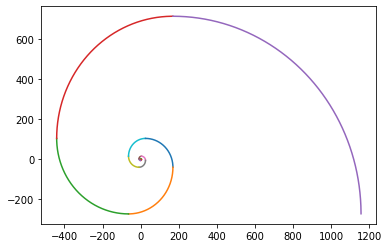

In [ ]:
espiral(5+4+4)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

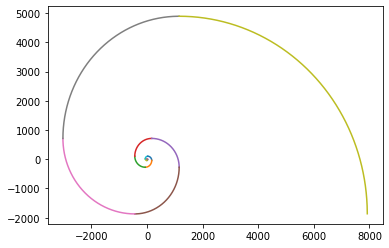

In [ ]:
espiral(5+4+4+4)

Se observa que $n=5+4+4+4...$ conserva la forma de la Espiral añadiendo una revolución a la misma. Esto puede notarse como que al añadir $4$ se está encerrando la anterior configuración de cuadrados en una nueva y por tanto la espiral es conservada. Algo que es notable es que la forma u orientación de la espiral falla cuando $n$ es par y se muestra a continuación. Esto se explica debido a que cuando $n$ es par, el trazo final no termina en la misma sección que cuando $n$ es impar; aunque aplicando el mismo analisis de $n=par+4+4+...$ se observa la conservación de la espiral pues se sigue generando una nueva revolución en ella

La configuración inicial es optima cuando $n=5$ y encerrando dicha configuración en nuevas configuraciones $n=5+4...$ se mantiene la optima forma de la espiral

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

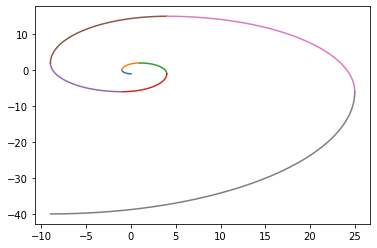

In [ ]:
espiral(6)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

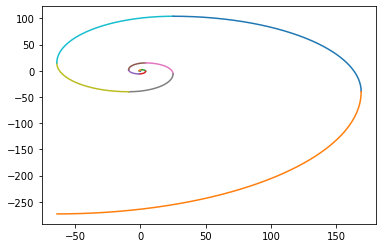

In [ ]:
espiral(6+4)

#**Ejercicio 4**

La serie Geometrica se define como 
$$\sum_{n=0}^{∞}r^n$$

Su valor converge a $\frac{{1}}{1-r}$ si y solo si $|r|<{1}$ y diverge para $|r|\geq1$

Construida como una función en función del Limite superior, se puede visualizar la convergencia optima que se logra a partir de cierta iteración sin necesidad de realizar infinitas iteraciones.

$$G(r,N)=\sum_{n=0}^{N}r^n$$

In [ ]:
def geometrica(r,n):
  sum = 0
  lista_sum = np.zeros(n+1)
  for i in range(n+1):
    sum += r**i
    lista_sum[i] = sum
  plt.plot(np.arange(n+1), lista_sum, label = "Valor Serie")
  if abs(r) < 1:
    convergencia = (1/(1-r))
    plt.plot(np.arange(n+1), np.full(n+1,convergencia), label = "Convergencia")
    plt.title(f"La serie converge a {convergencia}")
  else:
    plt.title("La serie diverge")
  plt.grid()
  plt.legend()
  plt.xlabel("Iteración")
  plt.ylabel("Valor de Convergencia")

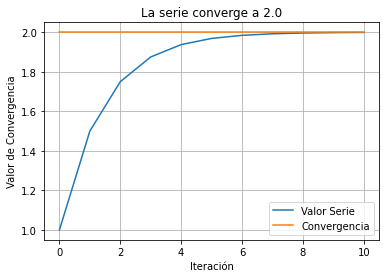

In [ ]:
geometrica(0.5,10)

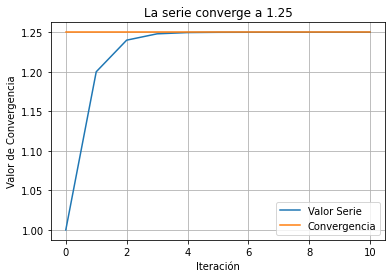

In [ ]:
geometrica(0.2,10)

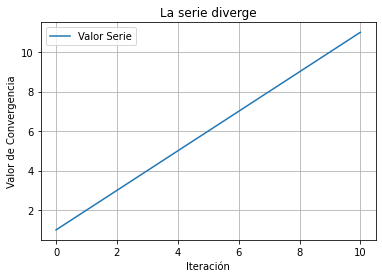

In [ ]:
geometrica(1,10)

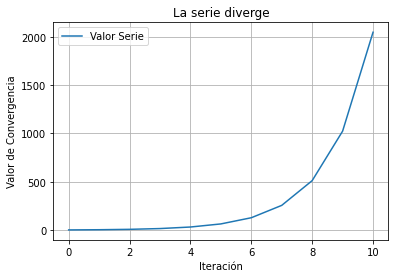

In [ ]:
geometrica(2,10)

Para $|r|<{1}$ se observa claramente la convergencia y el valor al que converge coincide con $\frac{{1}}{1-r}$. También se observa una relación directamente proporcional entre $r$ y el $N$ a partir del cual se logra una convergencia optima, por tanto, para valores cercanos a $1$ se requiere un mayor $N$ para lograr el valor optimo de convergencia. Para $\frac{{1}}{2}$ y $\frac{{1}}{5}$ se logra convergencia optima a partir de $N=7$ y $N=3$ respectivamente por lo que se puede garantizar un buen ritmo de convergencia.

In [ ]:
#Tarea 2 100/100

#1. Sucesión Fibonacci (Recursiva) 25/25

#2. Espiral Fibonacci 25/25

#3. Fractal +4 Fibonacci 25/25

#4. Serie Geométrica 25/25
#r=1/2 6/6
#r=1/5 6/6
#r=1   6/6
#r=2   6/6
